In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [2]:
supermarket=pd.read_excel("/content/Robinsons Supermarket dataset (1).xlsx")

In [3]:
supermarket.head()

,2023 Months,Product_Sector,Campaign_Goal,Channel_Used,Impressions,Clicks,Shares
0,Jan,Fashion,Brand Awareness,Facebook,1625,487,35
1,Jan,Fashion,Increase Sales,Facebook,1682,516,13
2,Jan,Fashion,Market Expansion,Facebook,2314,714,14
3,Jan,Fashion,Product Launch,Facebook,1537,477,33
4,Jan,Food,Brand Awareness,Facebook,1969,598,13


In [4]:
supermarket.tail()

,2023 Months,Product_Sector,Campaign_Goal,Channel_Used,Impressions,Clicks,Shares
715,Dec,Home,Product Launch,YouTube,489,115,35
716,Dec,Technology,Brand Awareness,YouTube,1494,425,17
717,Dec,Technology,Increase Sales,YouTube,1068,364,35
718,Dec,Technology,Market Expansion,YouTube,1529,433,21
719,Dec,Technology,Product Launch,YouTube,986,281,29


In [5]:
supermarket.shape

(720, 7)

In [6]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   2023 Months     720 non-null    object
 1   Product_Sector  720 non-null    object
 2   Campaign_Goal   720 non-null    object
 3   Channel_Used    720 non-null    object
 4   Impressions     720 non-null    int64 
 5   Clicks          720 non-null    int64 
 6   Shares          720 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 39.5+ KB


In [7]:
supermarket.isnull().sum()

,0
2023 Months,0
Product_Sector,0
Campaign_Goal,0
Channel_Used,0
Impressions,0
Clicks,0
Shares,0


In [8]:
supermarket.duplicated().sum()

0

In [9]:
supermarket['Impressions'] = supermarket['Impressions'].abs()
supermarket['Clicks'] = supermarket['Clicks'].abs()
supermarket['Shares'] = supermarket['Shares'].abs()

In [10]:
supermarket.groupby('2023 Months').size()

,0
2023 Months,
Apr,60
Aug,60
Dec,60
Feb,60
Jan,60
Jul,60
Jun,60
Mar,60
May,60


In [11]:
supermarket['2023 Months'] = np.where(supermarket['2023 Months'] == 'Noviembre', 'Nov', supermarket['2023 Months'])
supermarket['2023 Months'].value_counts()

,count
2023 Months,
Jan,60
Feb,60
Mar,60
Apr,60
May,60
Jun,60
Jul,60
Aug,60
Sep,60


In [12]:
supermarket.groupby('Product_Sector').size()

,0
Product_Sector,
Fashion,140
Fashion!!!!!,4
Food,140
H$m£,6
Health,144
Home,142
Tech$,4
Technology,140


In [13]:
supermarket['Product_Sector'] = np.where(supermarket['Product_Sector'] == 'Fashion!!!!!', 'Fashion', supermarket['Product_Sector'])
supermarket['Product_Sector'] = np.where(supermarket['Product_Sector'] == 'H$m£', 'Home', supermarket['Product_Sector'])
supermarket['Product_Sector'] = np.where(supermarket['Product_Sector'] == 'Tech$', 'Technology', supermarket['Product_Sector'])
supermarket['Product_Sector'].value_counts()

,count
Product_Sector,
Home,148
Fashion,144
Health,144
Technology,144
Food,140


In [14]:
supermarket.groupby('Campaign_Goal').size()

,0
Campaign_Goal,
Brand Awareness,180
Increase S@l£s,3
Increase Sales,177
Market Expansion,180
Product Launch,180


In [15]:
supermarket['Campaign_Goal'] = np.where(supermarket['Campaign_Goal'] == 'Increase S@l£s', 'Increase Sales',supermarket['Campaign_Goal'])
supermarket['Campaign_Goal'].value_counts()

,count
Campaign_Goal,
Brand Awareness,180
Increase Sales,180
Market Expansion,180
Product Launch,180


In [16]:
supermarket.groupby('Channel_Used').size()

,0
Channel_Used,
Face b**k,2
Facebook,238
Instagram,238
Instgrm,2
YouTube,240


In [17]:
supermarket['Channel_Used'] = np.where(supermarket['Channel_Used'] == 'Face b**k', 'Facebook',supermarket['Channel_Used'])
supermarket['Channel_Used'] = np.where(supermarket['Channel_Used'] == 'Instgrm', 'Instagram',supermarket['Channel_Used'])
supermarket['Channel_Used'].value_counts()


,count
Channel_Used,
Facebook,240
Instagram,240
YouTube,240


In [18]:
supermarket.describe()

,Impressions,Clicks,Shares
count,720.000000,720.000000,720.000000
mean,1664.358333,509.058333,28.090278
std,698.962286,247.666213,20.060102
min,0.000000,0.000000,0.000000
25%,1166.500000,326.000000,14.000000
50%,1597.000000,479.000000,25.000000
75%,2112.250000,674.750000,38.000000
max,3901.000000,1317.000000,141.000000


In [19]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=supermarket['Impressions'], name='Impressions', marker_color='blue'))
fig.add_trace(go.Box(y=supermarket['Clicks'], name='Clicks', marker_color='green'))
fig.add_trace(go.Box(y=supermarket['Shares'], name='Shares', marker_color='red'))
fig.update_layout(title='Boxplots of Wealth Data', xaxis_title='Categories', yaxis_title='Values', boxmode='group')
fig.show()

In [20]:
numeric_columns = supermarket.select_dtypes(include=['int', 'float'])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
numeric_columns_adjusted = numeric_columns.clip(lower=lower_bound, upper=upper_bound, axis=1)

In [21]:
fig = go.Figure()
fig.add_trace(go.Box(y=numeric_columns_adjusted['Impressions'], name='Impressions', marker_color='blue'))
fig.add_trace(go.Box(y=numeric_columns_adjusted['Clicks'], name='Clicks	', marker_color='green'))
fig.add_trace(go.Box(y=numeric_columns_adjusted['Shares'], name='Shares', marker_color='red'))
fig.update_layout(title='Adjusted Boxplots of Wealth Data (Outliers Clipped)', xaxis_title='Categories', yaxis_title='Values', boxmode='group')
fig.show()

In [22]:
supermarket.sample(40)

,2023 Months,Product_Sector,Campaign_Goal,Channel_Used,Impressions,Clicks,Shares
205,Nov,Food,Increase Sales,Facebook,1508,566,77
422,Oct,Fashion,Market Expansion,Instagram,2456,753,10
639,Aug,Technology,Product Launch,YouTube,1319,366,17
426,Oct,Food,Market Expansion,Instagram,1693,521,26
32,Feb,Home,Brand Awareness,Facebook,1907,592,17
621,Aug,Fashion,Increase Sales,YouTube,1357,357,19
163,Sep,Fashion,Product Launch,Facebook,2865,959,22
165,Sep,Food,Increase Sales,Facebook,1218,440,43
507,Feb,Food,Product Launch,YouTube,1464,393,9
253,Jan,Home,Increase Sales,Instagram,1520,463,43


Research objectives and **tasks**

CHALLENGE-1

In [23]:
import tabulate
social_media_data = supermarket[supermarket['Channel_Used'].isin(['Facebook', 'Instagram', 'YouTube'])]
platform_summary = social_media_data.groupby('Channel_Used')[['Impressions', 'Clicks', 'Shares']].sum()
platform_summary['Total_Impact'] = platform_summary[['Impressions', 'Clicks', 'Shares']].sum(axis=1)
best_platform = platform_summary['Total_Impact'].idxmax()
print("\nComparison of Social Media Platforms based on Total Impact (Impressions + Clicks + Shares):")
print(tabulate.tabulate(platform_summary, headers='keys', tablefmt='pretty'))
print(f"\nThe social media platform that generates the best overall results is: {best_platform}")


Comparison of Social Media Platforms based on Total Impact (Impressions + Clicks + Shares):
+--------------+-------------+--------+--------+--------------+
| Channel_Used | Impressions | Clicks | Shares | Total_Impact |
+--------------+-------------+--------+--------+--------------+
|   Facebook   |   517325    | 169592 |  9759  |    696676    |
|  Instagram   |   424697    | 128448 |  5341  |    558486    |
|   YouTube    |   256316    | 68482  |  5125  |    329923    |
+--------------+-------------+--------+--------+--------------+

The social media platform that generates the best overall results is: Facebook


CHALLENGE-2

In [24]:
sector_summary = social_media_data.groupby('Product_Sector')[['Impressions', 'Clicks', 'Shares']].sum()
sector_summary['Total_Impact'] = sector_summary[['Impressions', 'Clicks', 'Shares']].sum(axis=1)
most_impacted_sector = sector_summary['Total_Impact'].idxmax()
print("\nComparison of Product Sector performance from social media advertising:")
print(tabulate.tabulate(sector_summary, headers='keys', tablefmt='pretty'))
print(f"\nThe product sector most positively impacted by social media advertising is: {most_impacted_sector}")


Comparison of Product Sector performance from social media advertising:
+----------------+-------------+--------+--------+--------------+
| Product_Sector | Impressions | Clicks | Shares | Total_Impact |
+----------------+-------------+--------+--------+--------------+
|    Fashion     |   230802    | 70552  |  3953  |    305307    |
|      Food      |   218861    | 66799  |  3572  |    289232    |
|     Health     |   235815    | 72069  |  4063  |    311947    |
|      Home      |   240123    | 73122  |  4165  |    317410    |
|   Technology   |   272737    | 83980  |  4472  |    361189    |
+----------------+-------------+--------+--------+--------------+

The product sector most positively impacted by social media advertising is: Technology


CHALLENGE-3

In [25]:
campaign_goal_summary = social_media_data.groupby(['Channel_Used', 'Campaign_Goal'])[['Impressions', 'Clicks', 'Shares']].sum()
campaign_goal_summary['Total_Impact'] = campaign_goal_summary[['Impressions', 'Clicks', 'Shares']].sum(axis=1)
campaign_goal_unstacked = campaign_goal_summary['Total_Impact'].unstack()
print("\nBest Campaign Goals for Each Social Media Platform based on Total Impact (Impressions + Clicks + Shares):")
print(tabulate.tabulate(campaign_goal_unstacked, headers='keys', tablefmt='pretty'))


Best Campaign Goals for Each Social Media Platform based on Total Impact (Impressions + Clicks + Shares):
+--------------+-----------------+----------------+------------------+----------------+
| Channel_Used | Brand Awareness | Increase Sales | Market Expansion | Product Launch |
+--------------+-----------------+----------------+------------------+----------------+
|   Facebook   |     168750      |     171865     |      173821      |     182240     |
|  Instagram   |     143980      |     145562     |      135177      |     133767     |
|   YouTube    |      80366      |     84827      |      83725       |     81005      |
+--------------+-----------------+----------------+------------------+----------------+


CHALLENGE-4


Comparison of Facebook performance before and after SOS Marketing trial:
+-------------+-----------+------------+--------+--------------------+
|   Metric    | Pre-Trial | Post-Trial | Change | Percentage Change  |
+-------------+-----------+------------+--------+--------------------+
| Impressions |   81709   |   435616   | 353907 | 433.13098924231116 |
|   Clicks    |   26629   |   142963   | 116334 | 436.8695782793195  |
|   Shares    |   1249    |    8510    |  7261  | 581.3450760608487  |
+-------------+-----------+------------+--------+--------------------+


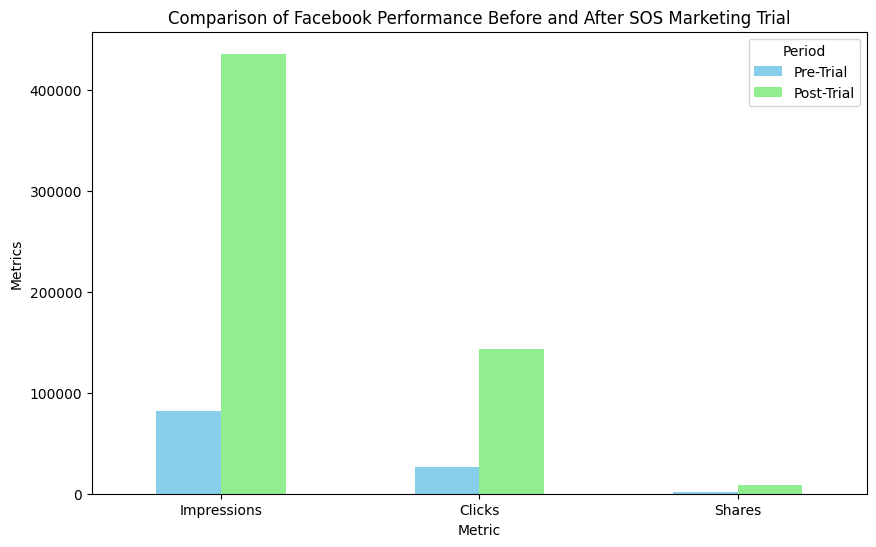

The SOS Marketing trial had a positive impact on the performance of the Facebook account.


In [26]:
warnings.filterwarnings("ignore")
facebook_data = supermarket[supermarket['Channel_Used'] == 'Facebook']
facebook_data['Trial_Period'] = facebook_data['2023 Months'].apply(lambda x: 'Post-Trial' if x >= 'August' else 'Pre-Trial')
pre_trial_data = facebook_data[facebook_data['Trial_Period'] == 'Pre-Trial']
post_trial_data = facebook_data[facebook_data['Trial_Period'] == 'Post-Trial']
pre_trial_summary = pre_trial_data[['Impressions', 'Clicks', 'Shares']].sum()
post_trial_summary = post_trial_data[['Impressions', 'Clicks', 'Shares']].sum()
comparison_df = pd.DataFrame({
    'Metric': ['Impressions', 'Clicks', 'Shares'],
    'Pre-Trial': pre_trial_summary.values,
    'Post-Trial': post_trial_summary.values
})
comparison_df['Change'] = comparison_df['Post-Trial'] - comparison_df['Pre-Trial']
comparison_df['Percentage Change'] = (comparison_df['Change'] / comparison_df['Pre-Trial']) * 100
print("\nComparison of Facebook performance before and after SOS Marketing trial:")
print(tabulate.tabulate(comparison_df, headers='keys', tablefmt='pretty', showindex=False))
comparison_df.set_index('Metric')[['Pre-Trial', 'Post-Trial']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Comparison of Facebook Performance Before and After SOS Marketing Trial')
plt.ylabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Period')
plt.show()
if post_trial_summary.sum() > pre_trial_summary.sum():
    print("The SOS Marketing trial had a positive impact on the performance of the Facebook account.")
else:
    print("The SOS Marketing trial did not have a significant positive impact on the performance of the Facebook account.")


TASK 3

Question-1

In [27]:
sector_summary = supermarket.groupby('Product_Sector')[['Impressions', 'Clicks', 'Shares']].sum()
sector_summary['Total_Performance'] = sector_summary[['Impressions', 'Clicks', 'Shares']].sum(axis=1)
benchmark_comparison_df = sector_summary.reset_index()
print("\nBenchmark Comparison of Product Sectors Total Performance:")
print(tabulate.tabulate(benchmark_comparison_df, headers='keys', tablefmt='pretty', showindex=False))



Benchmark Comparison of Product Sectors Total Performance:
+----------------+-------------+--------+--------+-------------------+
| Product_Sector | Impressions | Clicks | Shares | Total_Performance |
+----------------+-------------+--------+--------+-------------------+
|    Fashion     |   230802    | 70552  |  3953  |      305307       |
|      Food      |   218861    | 66799  |  3572  |      289232       |
|     Health     |   235815    | 72069  |  4063  |      311947       |
|      Home      |   240123    | 73122  |  4165  |      317410       |
|   Technology   |   272737    | 83980  |  4472  |      361189       |
+----------------+-------------+--------+--------+-------------------+


Question-2

In [28]:
channel_month_summary = supermarket.groupby(['2023 Months', 'Channel_Used'])[['Impressions', 'Clicks', 'Shares']].sum().reset_index()
print("\nBenchmark Comparison of Social Media Channels Performance by Month:")
print(tabulate.tabulate(channel_month_summary, headers='keys', tablefmt='pretty', showindex=False))


Benchmark Comparison of Social Media Channels Performance by Month:
+-------------+--------------+-------------+--------+--------+
| 2023 Months | Channel_Used | Impressions | Clicks | Shares |
+-------------+--------------+-------------+--------+--------+
|     Apr     |   Facebook   |    40770    | 12454  |  468   |
|     Apr     |  Instagram   |    34969    | 10566  |  451   |
|     Apr     |   YouTube    |    19981    |  5330  |  463   |
|     Aug     |   Facebook   |    40939    | 14175  |  781   |
|     Aug     |  Instagram   |    37273    | 11292  |  486   |
|     Aug     |   YouTube    |    23755    |  6340  |  514   |
|     Dec     |   Facebook   |    54140    | 18704  |  1762  |
|     Dec     |  Instagram   |    33702    | 10143  |  406   |
|     Dec     |   YouTube    |    22794    |  6196  |  402   |
|     Feb     |   Facebook   |    34362    | 10479  |  573   |
|     Feb     |  Instagram   |    36452    | 11104  |  503   |
|     Feb     |   YouTube    |    18569    |  489

Question-3

In [29]:
social_media_data = supermarket[supermarket['Channel_Used'].isin(['Facebook', 'Instagram', 'YouTube'])]
campaign_goal_summary = social_media_data.groupby(['Channel_Used', 'Campaign_Goal'])[['Impressions', 'Clicks', 'Shares']].sum().reset_index()
print("\nBenchmark Comparison of Social Media Platform Performance by Campaign Goals:")
print(tabulate.tabulate(campaign_goal_summary, headers='keys', tablefmt='pretty', showindex=False))



Benchmark Comparison of Social Media Platform Performance by Campaign Goals:
+--------------+------------------+-------------+--------+--------+
| Channel_Used |  Campaign_Goal   | Impressions | Clicks | Shares |
+--------------+------------------+-------------+--------+--------+
|   Facebook   | Brand Awareness  |   125170    | 41166  |  2414  |
|   Facebook   |  Increase Sales  |   127526    | 41965  |  2374  |
|   Facebook   | Market Expansion |   128977    | 42376  |  2468  |
|   Facebook   |  Product Launch  |   135652    | 44085  |  2503  |
|  Instagram   | Brand Awareness  |   109447    | 33134  |  1399  |
|  Instagram   |  Increase Sales  |   110661    | 33487  |  1414  |
|  Instagram   | Market Expansion |   102951    | 31024  |  1202  |
|  Instagram   |  Product Launch  |   101638    | 30803  |  1326  |
|   YouTube    | Brand Awareness  |    62299    | 16725  |  1342  |
|   YouTube    |  Increase Sales  |    66046    | 17714  |  1067  |
|   YouTube    | Market Expansion |   

TASK - 4

Question-1

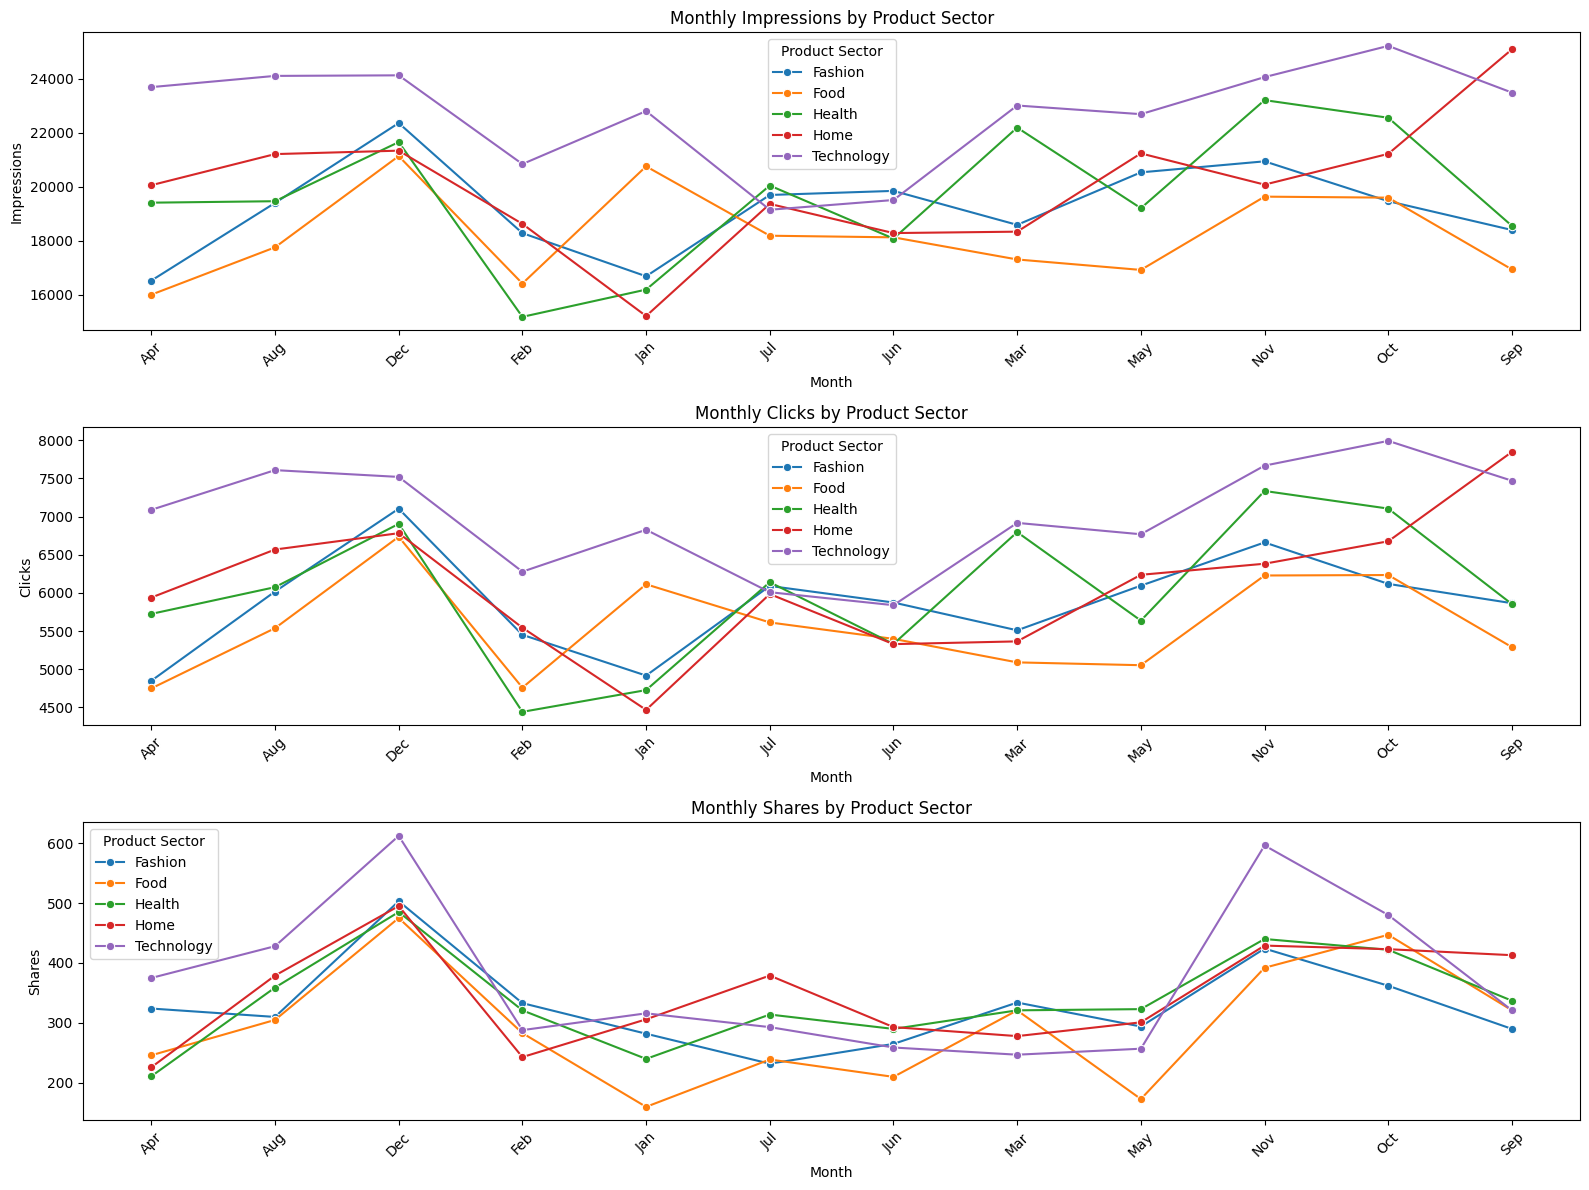

In [30]:
sector_month_summary = supermarket.groupby(['Product_Sector', '2023 Months'])[['Impressions', 'Clicks', 'Shares']].sum().reset_index()
plt.figure(figsize=(16, 12))
for i, metric in enumerate(['Impressions', 'Clicks', 'Shares'], start=1):
    plt.subplot(3, 1, i)
    sns.lineplot(data=sector_month_summary, x='2023 Months', y=metric, hue='Product_Sector', marker='o')
    plt.title(f'Monthly {metric} by Product Sector')
    plt.xlabel('Month')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title='Product Sector')

plt.tight_layout()
plt.show()


Question-2

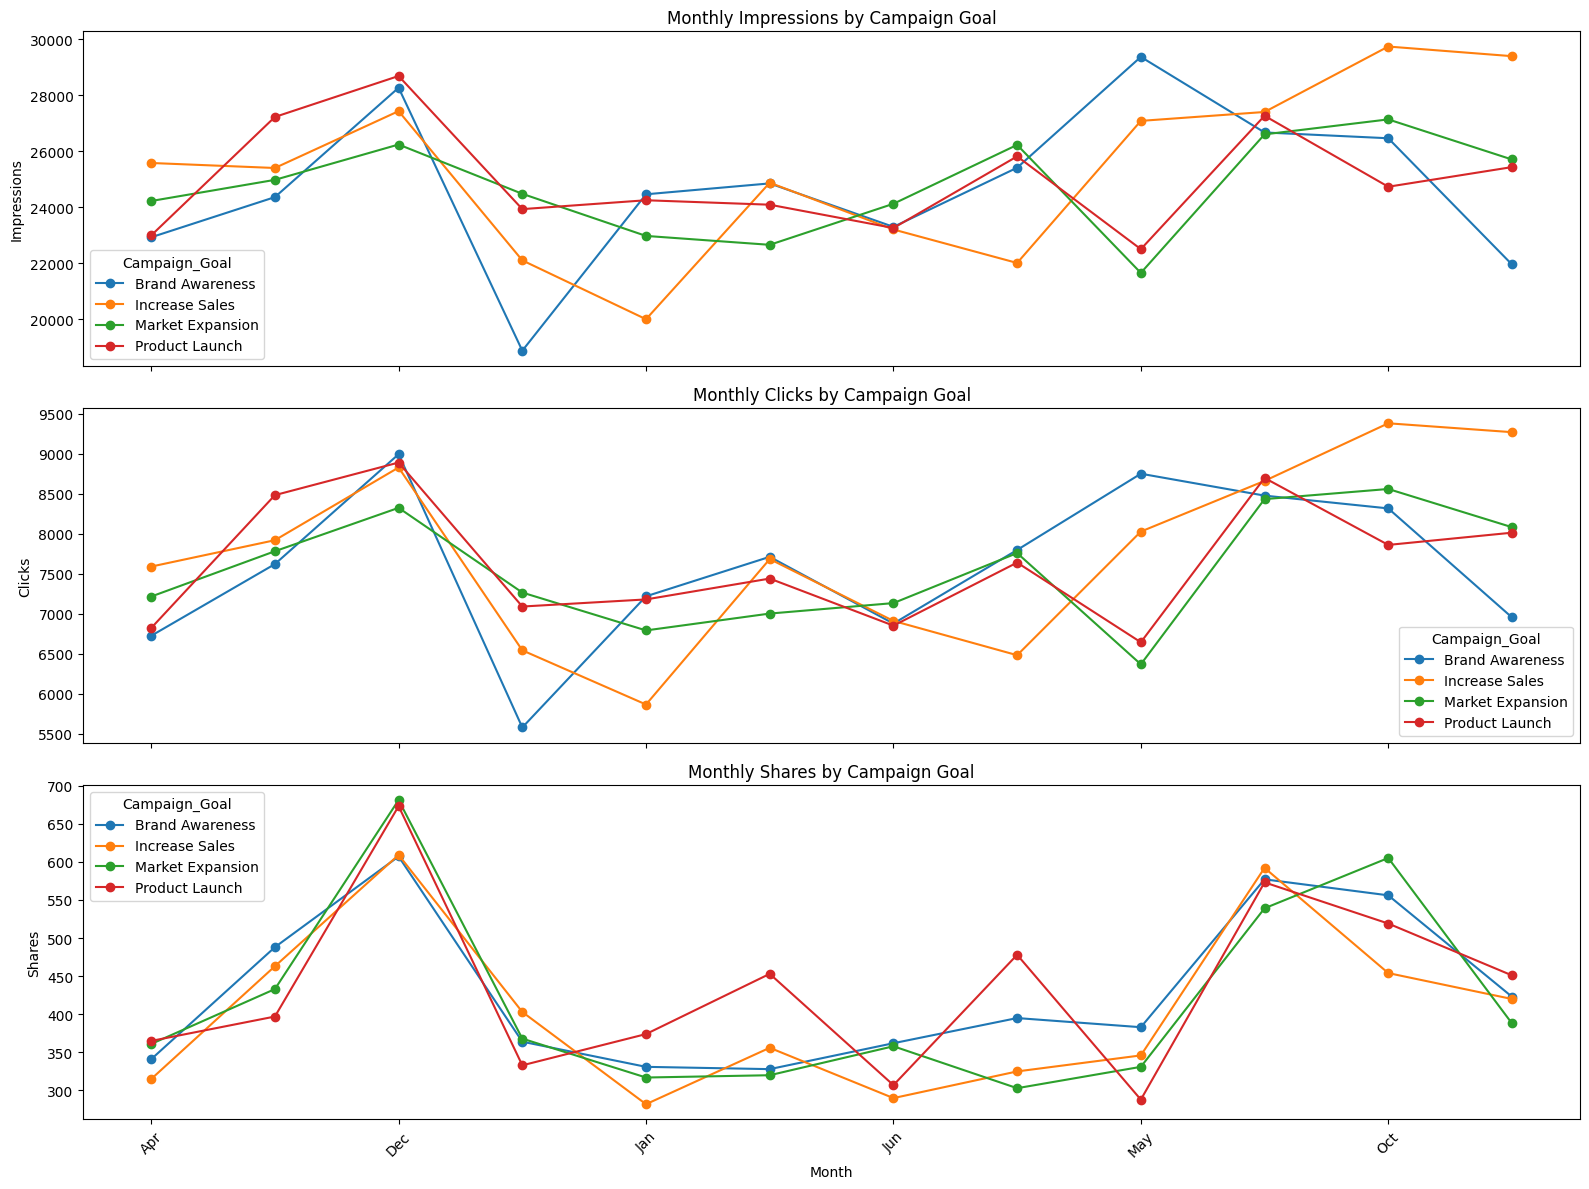

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
campaign_goal_month_summary = supermarket.groupby(['Campaign_Goal', '2023 Months'])[['Impressions', 'Clicks', 'Shares']].sum().reset_index()

pivot_impressions = campaign_goal_month_summary.pivot_table(index='2023 Months', columns='Campaign_Goal', values='Impressions', aggfunc='sum')
pivot_clicks = campaign_goal_month_summary.pivot_table(index='2023 Months', columns='Campaign_Goal', values='Clicks', aggfunc='sum')
pivot_shares = campaign_goal_month_summary.pivot_table(index='2023 Months', columns='Campaign_Goal', values='Shares', aggfunc='sum')
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)
pivot_impressions.plot.line(ax=axes[0], marker='o')
axes[0].set_title('Monthly Impressions by Campaign Goal')
axes[0].set_ylabel('Impressions')

pivot_clicks.plot.line(ax=axes[1], marker='o')
axes[1].set_title('Monthly Clicks by Campaign Goal')
axes[1].set_ylabel('Clicks')

pivot_shares.plot.line(ax=axes[2], marker='o')
axes[2].set_title('Monthly Shares by Campaign Goal')
axes[2].set_ylabel('Shares')


plt.xticks(rotation=45)
plt.xlabel('Month')
plt.tight_layout()
plt.show()


Questi0on-3


Comparison of Facebook performance before and after SOS Marketing trial:
+-------------+-----------+------------+--------+--------------------+
|   Metric    | Pre-Trial | Post-Trial | Change | Percentage Change  |
+-------------+-----------+------------+--------+--------------------+
| Impressions |   81709   |   435616   | 353907 | 433.13098924231116 |
|   Clicks    |   26629   |   142963   | 116334 | 436.8695782793195  |
|   Shares    |   1249    |    8510    |  7261  | 581.3450760608487  |
+-------------+-----------+------------+--------+--------------------+


<Figure size 1000x600 with 0 Axes>

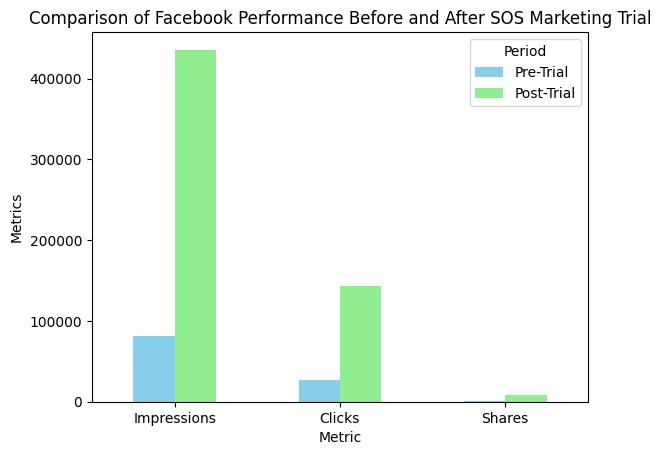

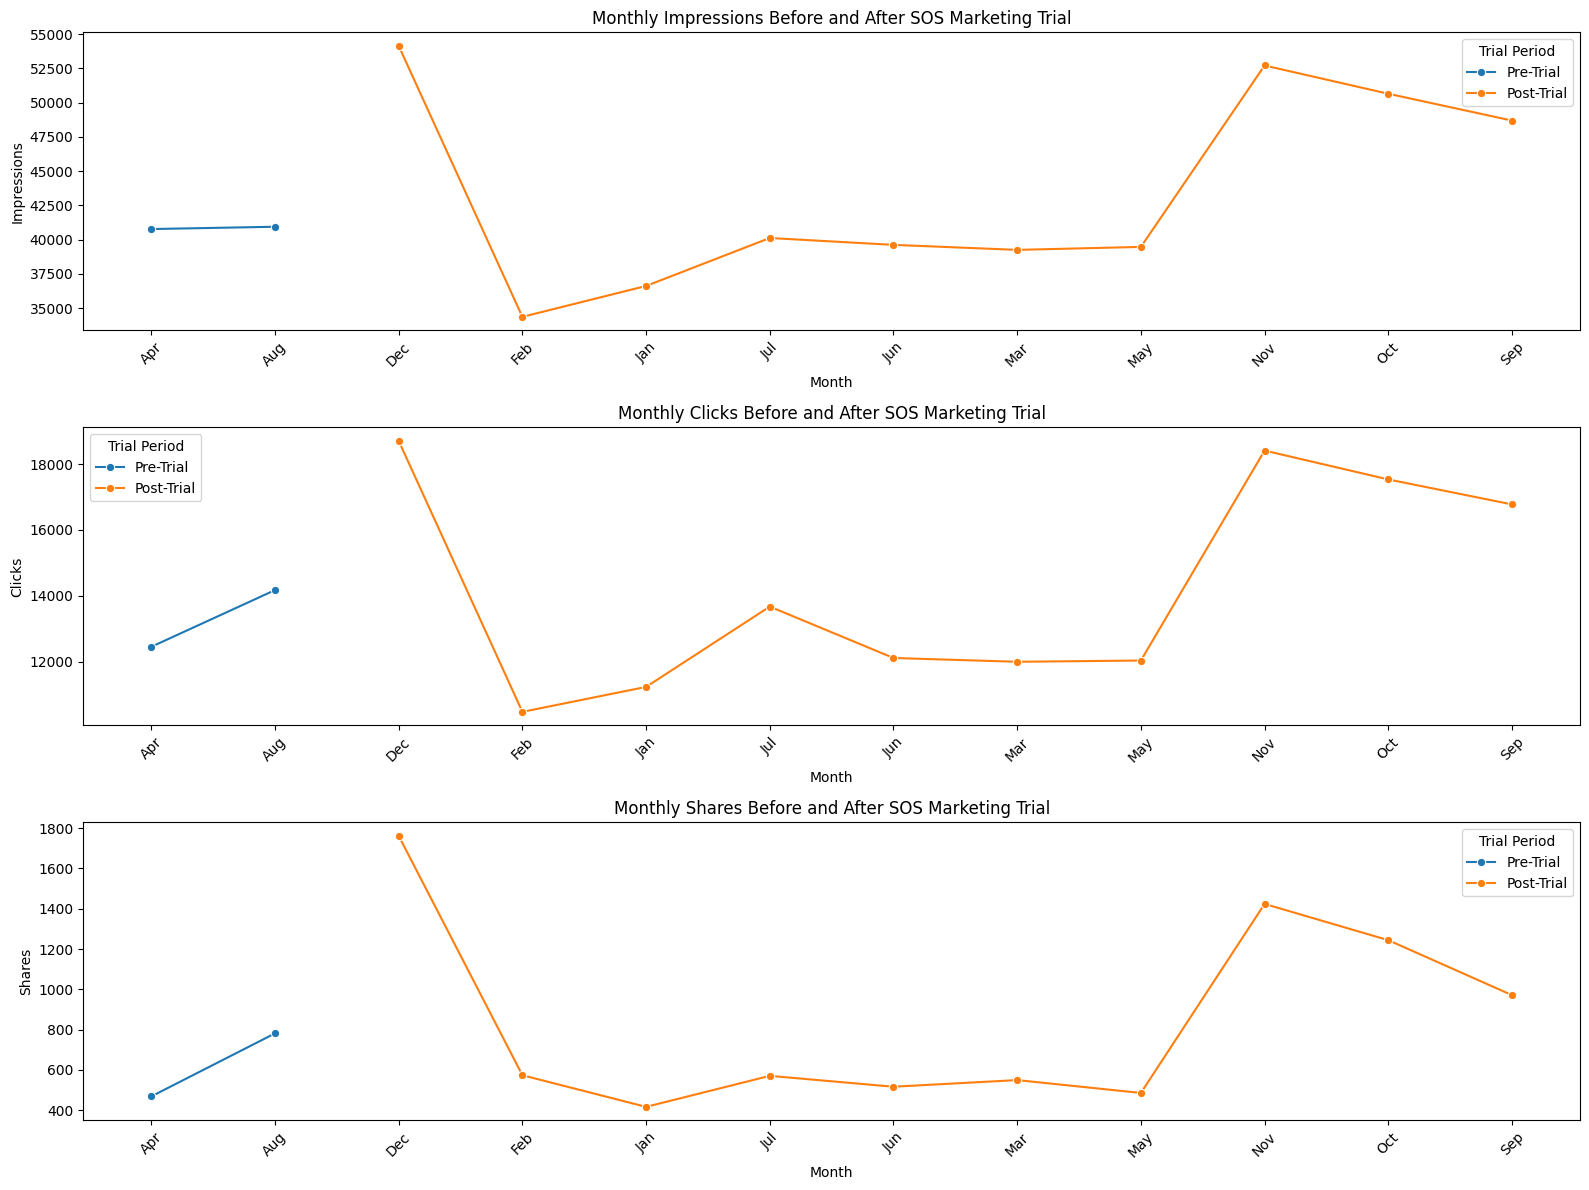

In [32]:
facebook_data = supermarket[supermarket['Channel_Used'] == 'Facebook']
trial_start_month = 'August'
facebook_data['Trial_Period'] = facebook_data['2023 Months'].apply(lambda x: 'Post-Trial' if x >= trial_start_month else 'Pre-Trial')
pre_trial_data = facebook_data[facebook_data['Trial_Period'] == 'Pre-Trial']
post_trial_data = facebook_data[facebook_data['Trial_Period'] == 'Post-Trial']
pre_trial_summary = pre_trial_data[['Impressions', 'Clicks', 'Shares']].sum()
post_trial_summary = post_trial_data[['Impressions', 'Clicks', 'Shares']].sum()
comparison_df = pd.DataFrame({
    'Metric': ['Impressions', 'Clicks', 'Shares'],
    'Pre-Trial': pre_trial_summary.values,
    'Post-Trial': post_trial_summary.values
})
comparison_df['Change'] = comparison_df['Post-Trial'] - comparison_df['Pre-Trial']
comparison_df['Percentage Change'] = (comparison_df['Change'] / comparison_df['Pre-Trial']) * 100

import tabulate
print("\nComparison of Facebook performance before and after SOS Marketing trial:")
print(tabulate.tabulate(comparison_df, headers='keys', tablefmt='pretty', showindex=False))

plt.figure(figsize=(10, 6))
comparison_df.set_index('Metric')[['Pre-Trial', 'Post-Trial']].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Comparison of Facebook Performance Before and After SOS Marketing Trial')
plt.ylabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Period')
plt.show()
monthly_summary = facebook_data.groupby(['2023 Months', 'Trial_Period'])[['Impressions', 'Clicks', 'Shares']].sum().reset_index()

plt.figure(figsize=(16, 12))
for i, metric in enumerate(['Impressions', 'Clicks', 'Shares'], start=1):
    plt.subplot(3, 1, i)
    sns.lineplot(data=monthly_summary, x='2023 Months', y=metric, hue='Trial_Period', marker='o')
    plt.title(f'Monthly {metric} Before and After SOS Marketing Trial')
    plt.xlabel('Month')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(title='Trial Period')

plt.tight_layout()
plt.show()
